# import libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# LOAD DATASETS

In [21]:
data=pd.read_csv("C:\\Users\\PRAJES DAS\\Downloads\\education_suggestion.csv")

In [22]:
data

,Subject,User_Language,User_Level,Text_Book,Online_Course,Suggested_App
0,Mathematics,English,Advanced,"""Calculus"" by James Stewart","""Introduction to Probability and Data"" by Duke...",edX
1,English Language,Hindi,Beginner,"""The Norton Anthology of English Literature"" e...","""English Grammar Launch: Upgrade your speaking...",Udemy
2,History,English,Intermediate,"""A People's History of the United States"" by H...","""The Modern World, Part One: Global History fr...",Coursera
3,Science,Hindi,Advanced,NCERT,"""Introduction to science :pratham batch""",edX
4,Geography,English,Beginner,"""Geosystems: An Introduction to Physical Geogr...","""The Complete Geography Course: Teach Yoursel...",Udemy
...,...,...,...,...,...,...
95,Product Design,Hindi,Advanced,"""Product Design and Development"" by Karl Ulric...",Udemy: Product Design: Complete Guide in 2021...,Udemy
96,Architecture,English,Beginner,"""Architecture: Form, Space, and Order"" by Fran...",edX: Architecture by Harvard University,edX
97,Urban Planning,Hindi,Advanced,"Urban Planning and Design Criteria"" by Frederi...",Udemy: Introduction to Urban Planning by Micha...,Udemy
98,Landscape Architecture,English,Beginner,"""Landscape Architecture: A Manual of Environme...",Coursera: Landscape Architecture by University...,Coursera


# EXPLOARATORY DATA ANALYSIS

In [23]:
data.shape

(100, 6)

In [24]:
#checjing missing values
data.isnull().sum()

Subject          0
User_Language    0
User_Level       0
Text_Book        0
Online_Course    0
Suggested_App    0
dtype: int64

In [25]:
#check duplicate
data.duplicated().sum()

0

In [26]:
#check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Subject        100 non-null    object
 1   User_Language  100 non-null    object
 2   User_Level     100 non-null    object
 3   Text_Book      100 non-null    object
 4   Online_Course  100 non-null    object
 5   Suggested_App  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [27]:
data.describe()

,Subject,User_Language,User_Level,Text_Book,Online_Course,Suggested_App
count,100,100,100,100,100,100
unique,100,2,3,100,100,3
top,Mathematics,English,Advanced,"""Calculus"" by James Stewart","""Introduction to Probability and Data"" by Duke...",Coursera
freq,1,50,37,1,1,48


#  TEST AND TRAIN THE MODEL

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder


In [29]:
# Separate features and target variable
X = data.drop(['Text_Book', 'Online_Course', 'Suggested_App'], axis=1)
y_textbook = data['Text_Book']
y_online_course = data['Online_Course']
y_suggested_app = data['Suggested_App']

In [30]:
# # One-hot encode categorical variables
# X_encoded = pd.get_dummies(X)

In [31]:
# X_encoded.corr()


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [33]:
# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical columns
data['Subject'] = label_encoder.fit_transform(data['Subject'])
data['User_Language'] = label_encoder.fit_transform(data['User_Language'])
data['User_Level'] = label_encoder.fit_transform(data['User_Level'])
data['Text_Book'] = label_encoder.fit_transform(data['Text_Book'])
data['Online_Course'] = label_encoder.fit_transform(data['Online_Course'])
data['Suggested_App'] = label_encoder.fit_transform(data['Suggested_App'])


In [34]:
data.corr()

,Subject,User_Language,User_Level,Text_Book,Online_Course,Suggested_App
Subject,1.000000,0.253585,-0.081074,0.360120,0.189055,0.076069
User_Language,0.253585,1.000000,0.012481,0.140650,0.071364,0.081832
User_Level,-0.081074,0.012481,1.000000,0.094910,-0.089722,-0.151164
Text_Book,0.360120,0.140650,0.094910,1.000000,-0.147555,-0.017954
Online_Course,0.189055,0.071364,-0.089722,-0.147555,1.000000,0.402080
Suggested_App,0.076069,0.081832,-0.151164,-0.017954,0.402080,1.000000


In [35]:
data

,Subject,User_Language,User_Level,Text_Book,Online_Course,Suggested_App
0,22,0,0,14,34,2
1,9,1,1,84,32,1
2,16,0,2,3,35,0
3,89,1,0,98,33,2
4,13,0,1,34,11,1
...,...,...,...,...,...,...
95,82,1,0,64,28,1
96,35,0,1,8,93,2
97,96,1,0,99,79,1
98,65,0,1,51,55,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Subject        100 non-null    int32
 1   User_Language  100 non-null    int32
 2   User_Level     100 non-null    int32
 3   Text_Book      100 non-null    int32
 4   Online_Course  100 non-null    int32
 5   Suggested_App  100 non-null    int32
dtypes: int32(6)
memory usage: 2.5 KB


<Axes: >

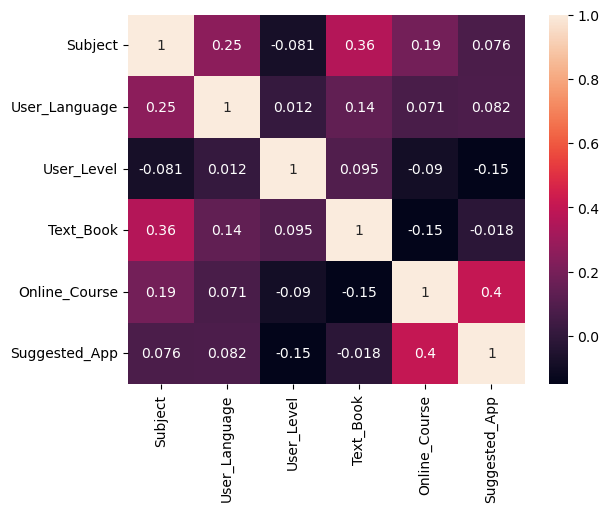

In [37]:
sns.heatmap(data.corr(),annot=True)

In [38]:

# Encode categorical columns
df_encoded = data.apply(label_encoder.fit_transform)

# Splitting data for Text_Book
X_train_textbook, X_test_textbook, y_textbook_train, y_textbook_test = train_test_split(X_encoded, df_encoded['Text_Book'], test_size=0.2, random_state=42)

# Splitting data for Online_Course
X_train_online_course, X_test_online_course, y_online_course_train, y_online_course_test = train_test_split(X_encoded, df_encoded['Online_Course'], test_size=0.2, random_state=42)

# Splitting data for Suggested_App
X_train_suggested_app, X_test_suggested_app, y_suggested_app_train, y_suggested_app_test = train_test_split(X_encoded, df_encoded['Suggested_App'], test_size=0.2, random_state=42)


NameError: name 'X_encoded' is not defined

In [39]:
# Train decision tree classifiers
textbook_classifier = DecisionTreeClassifier()
textbook_classifier.fit(X_train, y_textbook_train)

online_course_classifier = DecisionTreeClassifier()
online_course_classifier.fit(X_train, y_online_course_train)

suggested_app_classifier = DecisionTreeClassifier()
suggested_app_classifier.fit(X_train, y_suggested_app_train)

NameError: name 'X_train' is not defined

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Plot the decision tree for the textbook classifier
plt.figure(figsize=(20,10))
plot_tree(textbook_classifier, feature_names=X_train.columns, class_names=[str(class_name) for class_name in textbook_classifier.classes_], filled=True)
plt.title("Decision Tree for Textbook Classifier")
plt.show()


NameError: name 'X_train' is not defined

<Figure size 2000x1000 with 0 Axes>

In [41]:
# Plot the decision tree for the online course classifier
plt.figure(figsize=(20,10))
plot_tree(online_course_classifier, feature_names=X_train.columns, class_names=[str(class_name) for class_name in online_course_classifier.classes_], filled=True)
plt.title("Decision Tree for Online Course Classifier")
plt.show()

NameError: name 'online_course_classifier' is not defined

<Figure size 2000x1000 with 0 Axes>

In [42]:
# Plot the decision tree for the suggested app classifier
plt.figure(figsize=(20,10))
plot_tree(suggested_app_classifier, feature_names=X_train.columns, class_names=[str(class_name) for class_name in suggested_app_classifier.classes_], filled=True)
plt.title("Decision Tree for Suggested App Classifier")
plt.show()

NameError: name 'suggested_app_classifier' is not defined

<Figure size 2000x1000 with 0 Axes>

In [43]:
# Conversation with the user
print("Hi! I'm here to assist you in finding the best learning resources for your needs.")

subject = input("What subject are you interested in learning about? (e.g., Mathematics, History, Programming) ")
user_level = input("What is your current level of expertise in this subject? (e.g., Beginner, Intermediate, Advanced) ")
user_language = input("What is your preferred language for learning? (e.g., English, Spanish, French) ")

print(f"\nGreat! Let's dive deeper. For {subject}, are you looking for traditional textbooks, online courses, or perhaps an educational app?")
preferred_type = input("Enter your preferred type (Textbooks/Online Courses/Apps) (e.g., Textbooks, Online Courses, Apps): ")

print(f"\nCould you also share any specific topics or areas within {subject} that you're particularly interested in? (e.g., Algebra, World War II, Python programming)")
specific_topic = input("Enter specific topic or interest: ")

print("\nBefore we proceed, could you tell me a bit about your learning style and preferences?")
learning_style = input("Do you prefer interactive learning experiences, in-depth theoretical explanations, or practical examples? (e.g., Interactive, Theoretical, Practical) ")

print("\nLastly, are there any specific features or functionalities you'd like the learning resource to have?")
features = input("Enter specific feature or functionality: ")

print("\nThank you for providing all those details! Based on what you've shared, I'll now recommend some tailored options for you. Please give me a moment to process your preferences.")


# Recommendation process
input_data = pd.DataFrame({'Subject': [subject], 'User_Language': [user_language], 'User_Level': [user_level]})
input_data_encoded = pd.get_dummies(input_data)

# Align input data with training data to ensure the same columns
input_data_encoded = input_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

textbook_prediction = textbook_classifier.predict(input_data_encoded)
online_course_prediction = online_course_classifier.predict(input_data_encoded)
suggested_app_prediction = suggested_app_classifier.predict(input_data_encoded)

# Print recommendations
print("\nHere are my recommendations:")
print("- Textbook:", textbook_prediction[0])
print("- Online Course:", online_course_prediction[0])
print("- Suggested App:", suggested_app_prediction[0])



print("\nWould you like more information about any of these recommendations, or is there anything else I can assist you with?")


Hi! I'm here to assist you in finding the best learning resources for your needs.
What subject are you interested in learning about? (e.g., Mathematics, History, Programming) Mathematics
What is your current level of expertise in this subject? (e.g., Beginner, Intermediate, Advanced) Beginner
What is your preferred language for learning? (e.g., English, Spanish, French) English

Great! Let's dive deeper. For Mathematics, are you looking for traditional textbooks, online courses, or perhaps an educational app?
Enter your preferred type (Textbooks/Online Courses/Apps) (e.g., Textbooks, Online Courses, Apps): Textbooks

Could you also share any specific topics or areas within Mathematics that you're particularly interested in? (e.g., Algebra, World War II, Python programming)
Enter specific topic or interest: Textbooks

Before we proceed, could you tell me a bit about your learning style and preferences?
Do you prefer interactive learning experiences, in-depth theoretical explanations, or

NameError: name 'X_encoded' is not defined

In [44]:
from sklearn.metrics import accuracy_score
# Predictions for test set
textbook_test_predictions = textbook_classifier.predict(X_test)
online_course_test_predictions = online_course_classifier.predict(X_test)
suggested_app_test_predictions = suggested_app_classifier.predict(X_test)

# Calculate accuracy scores
textbook_accuracy = accuracy_score(y_textbook_test, textbook_test_predictions)
online_course_accuracy = accuracy_score(y_online_course_test, online_course_test_predictions)
suggested_app_accuracy = accuracy_score(y_suggested_app_test, suggested_app_test_predictions)

print("Text_Book Accuracy:", textbook_accuracy)
print("Online_Course Accuracy:", online_course_accuracy)
print("Suggested_App Accuracy:", suggested_app_accuracy)


NameError: name 'X_test' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



# Separate features (X) and target variables (y)
X = data.drop(columns=['Text_Book', 'Online_Course', 'Suggested_App'])  # Features
y_textbook = data['Text_Book']  # Target variable for Textbook
y_online_course = data['Online_Course']  # Target variable for Online Course
y_suggested_app = data['Suggested_App']  # Target variable for Suggested App

# Split the data into training and testing sets for each target variable
X_train, X_test, y_textbook_train, y_textbook_test = train_test_split(X, y_textbook, test_size=0.2, random_state=42)
X_train, X_test, y_online_course_train, y_online_course_test = train_test_split(X, y_online_course, test_size=0.2, random_state=42)
X_train, X_test, y_suggested_app_train, y_suggested_app_test = train_test_split(X, y_suggested_app, test_size=0.2, random_state=42)

# Train decision tree classifiers for each target variable
textbook_classifier = DecisionTreeClassifier()
textbook_classifier.fit(X_train, y_textbook_train)

online_course_classifier = DecisionTreeClassifier()
online_course_classifier.fit(X_train, y_online_course_train)

suggested_app_classifier = DecisionTreeClassifier()
suggested_app_classifier.fit(X_train, y_suggested_app_train)

# Conversation with the user
print("Hi! I'm here to assist you in finding the best learning resources for your needs.")

subject = input("What subject are you interested in learning about? (e.g., Mathematics, History, Programming) ")
user_level = input("What is your current level of expertise in this subject? (e.g., Beginner, Intermediate, Advanced) ")
user_language = input("What is your preferred language for learning? (e.g., English, Spanish, French) ")

print(f"\nGreat! Let's dive deeper. For {subject}, are you looking for traditional textbooks, online courses, or perhaps an educational app?")
preferred_type = input("Enter your preferred type (Textbooks/Online Courses/Apps) (e.g., Textbooks, Online Courses, Apps): ")

print(f"\nCould you also share any specific topics or areas within {subject} that you're particularly interested in? (e.g., Algebra, World War II, Python programming)")
specific_topic = input("Enter specific topic or interest: ")

print("\nBefore we proceed, could you tell me a bit about your learning style and preferences?")
learning_style = input("Do you prefer interactive learning experiences, in-depth theoretical explanations, or practical examples? (e.g., Interactive, Theoretical, Practical) ")

print("\nLastly, are there any specific features or functionalities you'd like the learning resource to have?")
features = input("Enter specific feature or functionality: ")

print("\nThank you for providing all those details! Based on what you've shared, I'll now recommend some tailored options for you. Please give me a moment to process your preferences.")

# Recommendation process
input_data = pd.DataFrame({'Subject': [subject], 'User_Language': [user_language], 'User_Level': [user_level]})
input_data_encoded = pd.get_dummies(input_data)

# Align input data with training data to ensure the same columns
input_data_encoded = input_data_encoded.reindex(columns=X.columns, fill_value=0)

# Predictions
textbook_prediction = textbook_classifier.predict(input_data_encoded)
online_course_prediction = online_course_classifier.predict(input_data_encoded)
suggested_app_prediction = suggested_app_classifier.predict(input_data_encoded)

# Print recommendations
print("\nHere are my recommendations:")
print("- Textbook:", textbook_prediction[0])
print("- Online Course:", online_course_prediction[0])
print("- Suggested App:", suggested_app_prediction[0])

print("\nWould you like more information about any of these recommendations, or is there anything else I can assist you with?")
